<a href="https://colab.research.google.com/github/svmamidi/NYC-Taxi/blob/main/NYC__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import math
from math import radians, cos, sin, asin, acos, sqrt, pi
import pandas as pd
import numpy as np
from datetime import time
import datetime as dt
from datetime import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving nyc_taxi_trip_duration.csv to nyc_taxi_trip_duration.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['nyc_taxi_trip_duration.csv']))
print(data)

               id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                     1       

In [ ]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:

data['latitude_diff']=data['dropoff_latitude']-data['pickup_latitude']

data['longitude_diff']=data['dropoff_longitude']-data['pickup_longitude']

In [ ]:
distance= []
for i in range(len(data)):

    r= 6370
    a = (np.square(sin(data['latitude_diff'][i]) )/2) + cos(data['pickup_latitude'][i])* cos(data['dropoff_latitude'][i]) * np.square(sin((data['longitude_diff'][i])/2))
    #print(a)
    d = 2*r*asin(np.sqrt(a))
    #print(d)
    distance.append(d)
print(distance)


<ipython-input-6-bd03b00cefd4>:7: RuntimeWarning: invalid value encountered in sqrt
  d = 2*r*asin(np.sqrt(a))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
 df_distance = pd.DataFrame(list(distance))
 df_distance

,0
0,93.960025
1,334.070398
2,574.076699
3,190.893232
4,342.717811
...,...
729317,84.672367
729318,57.836770
729319,186.005883
729320,66.226183


In [ ]:
 df_distance.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
df_distance.rename(columns={0: 'distance'}, inplace=True)

In [ ]:
data_d=pd.concat([data,  df_distance], axis=1)

In [ ]:
data_d

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_diff,longitude_diff,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,-0.007710,-0.009956,93.960025
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,-0.036812,-0.006439,334.070398
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.053459,0.049286,574.076699
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.020908,0.004890,190.893232
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.032162,0.028938,342.717811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,-0.000599,0.013283,84.672367
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,-0.005524,-0.004654,57.836770
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,-0.020489,-0.003639,186.005883
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0.005569,-0.006844,66.226183


In [ ]:
data_d.shape

(729322, 14)

In [ ]:
data_d.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'latitude_diff', 'longitude_diff', 'distance'],
      dtype='object')

In [ ]:
data_d.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
latitude_diff         float64
longitude_diff        float64
distance              float64
dtype: object

In [ ]:
data_d.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
latitude_diff         0
longitude_diff        0
distance              2
dtype: int64

In [ ]:
data_d.dtypes[data_d.dtypes =='int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [ ]:
data['passenger_count']= data['passenger_count'].astype('category')

In [ ]:
data['vendor_id']= data['vendor_id'].astype('category')

In [ ]:
data_d.dtypes[data_d.dtypes =='float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
latitude_diff        float64
longitude_diff       float64
distance             float64
dtype: object

In [ ]:
data_d.dtypes[data_d.dtypes =='object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [ ]:
data_d.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
latitude_diff         float64
longitude_diff        float64
distance              float64
dtype: object

In [ ]:
# storing indices of all numerical data types in numerical_cols
numerical_cols = data_d.select_dtypes(include=['int', 'float']).columns

# checking
numerical_cols

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'latitude_diff', 'longitude_diff', 'distance'],
      dtype='object')

In [ ]:
data_d[numerical_cols].max()

vendor_id            2.000000e+00
passenger_count      9.000000e+00
pickup_longitude    -6.589738e+01
pickup_latitude      5.188108e+01
dropoff_longitude   -6.589738e+01
dropoff_latitude     4.392103e+01
trip_duration        1.939736e+06
latitude_diff        3.171005e+00
longitude_diff       1.659897e+00
distance             1.107278e+04
dtype: float64

In [ ]:
data_d[numerical_cols].min()

vendor_id              1.000000
passenger_count        0.000000
pickup_longitude    -121.933342
pickup_latitude       34.712234
dropoff_longitude   -121.933304
dropoff_latitude      32.181141
trip_duration          1.000000
latitude_diff        -11.130486
longitude_diff        -5.947296
distance               0.000000
dtype: float64

In [ ]:
data_d.describe(include=[int, float])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,latitude_diff,longitude_diff,distance
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729320.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0.000857,0.000091,269.700495
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,0.035589,0.046147,306.774231
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,-11.130486,-5.947296,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,-0.013435,-0.011253,96.835044
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0.000229,0.001350,165.280303
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0.014019,0.013962,307.544218
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,3.171005,1.659897,11072.778414


In [ ]:
data_d.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
latitude_diff         0
longitude_diff        0
distance              2
dtype: int64

In [ ]:
data_d= data_d.dropna(how='any',axis=0)

print(data_d)

               id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                     1       

In [ ]:
data_d.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
latitude_diff         0
longitude_diff        0
distance              0
dtype: int64

In [ ]:
data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,latitude_diff,longitude_diff
count,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0.000857,0.000091
std,0.069754,0.033594,0.069588,0.036037,3.864626e+03,0.035589,0.046147
min,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,-11.130486,-5.947296
25%,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,-0.013435,-0.011253
50%,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0.000229,0.001350
75%,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0.014019,0.013962
max,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,3.171005,1.659897


In [ ]:
#mean of passenger_count
data_d['passenger_count'].mean()

1.6620509515713267

In [ ]:
#meadian of passenger_count
data_d['passenger_count'].median()

1.0

In [ ]:
#mode of passenger_count
data_d['passenger_count'].mode()

0    1
Name: passenger_count, dtype: int64

In [ ]:
data_d['passenger_count'].value_counts()

passenger_count
1    517415
2    105096
5     38926
3     29692
6     24107
4     14049
0        33
7         1
9         1
Name: count, dtype: int64

In [ ]:
print(data_d['trip_duration'].std())
print(data_d['trip_duration'].var())

3864.630544651806
14935369.246655712


In [ ]:
print(data_d['distance'].std())
print(data_d['distance'].var())

306.7742313272462
94110.42900642275


<Axes: xlabel='trip_duration', ylabel='Count'>

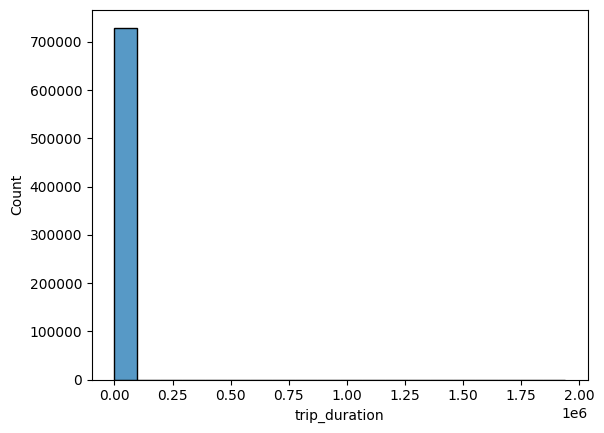

In [ ]:
sns.histplot(data_d['trip_duration'],kde=False,bins=20)

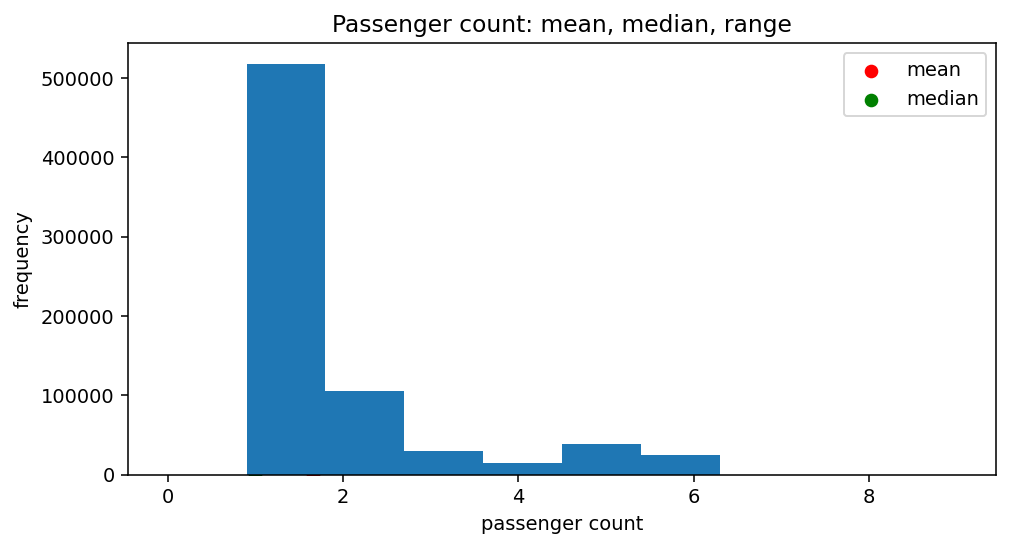

In [ ]:
# setting image resolution
plt.figure(figsize = (8,4), dpi = 140)

# Plotting histogram and descriptive summary
plt.scatter(data_d['passenger_count'].mean(), 0, label = 'mean', color = 'red')
plt.scatter(data_d['passenger_count'].median(), 0, label = 'median', color = 'green')
plt.hist(data_d['passenger_count'],bins=10)

# axes labels
plt.xlabel('passenger count')
plt.ylabel('frequency')
plt.title('Passenger count: mean, median, range')
plt.legend()

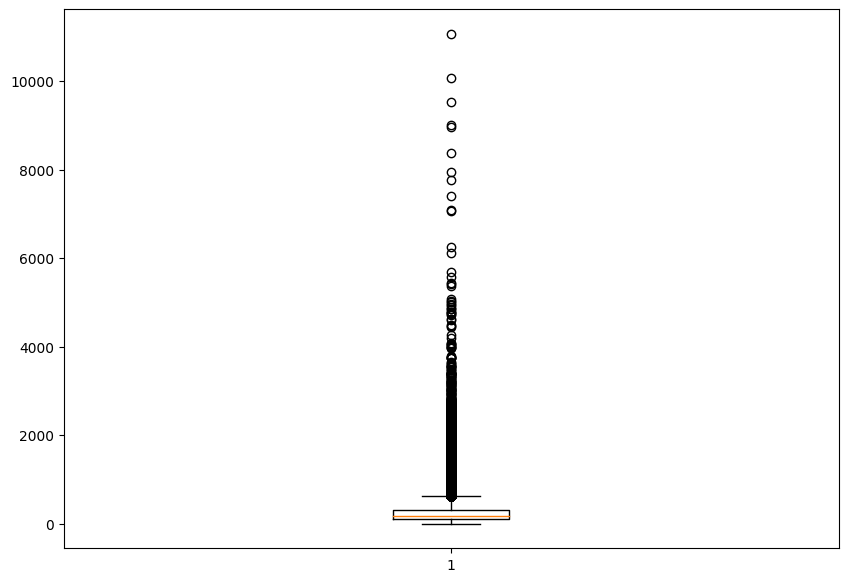

In [ ]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data_d['distance'])


# show plot
plt.show()

<Axes: ylabel='trip_duration'>

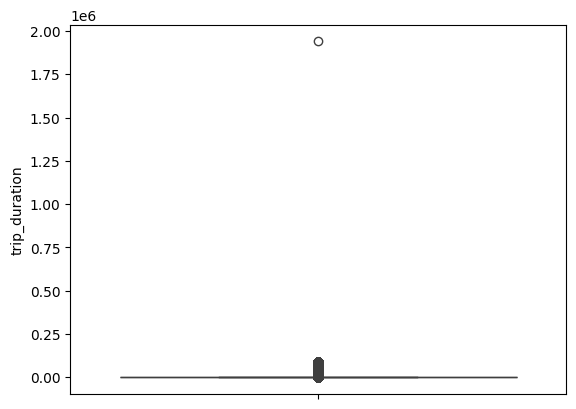

In [ ]:
sns.boxplot(data_d['trip_duration'])

In [ ]:
data_d['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
512833          1
70318           1
102646          1
398887          1
566349          1
Name: trip_duration, Length: 729320, dtype: int64

In [ ]:
data_d.drop(data_d[data_d['trip_duration'] == 1939736].index, inplace = True)


<ipython-input-41-ffec6da6bc34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_d.drop(data_d[data_d['trip_duration'] == 1939736].index, inplace = True)


<Axes: xlabel='vendor_id', ylabel='count'>

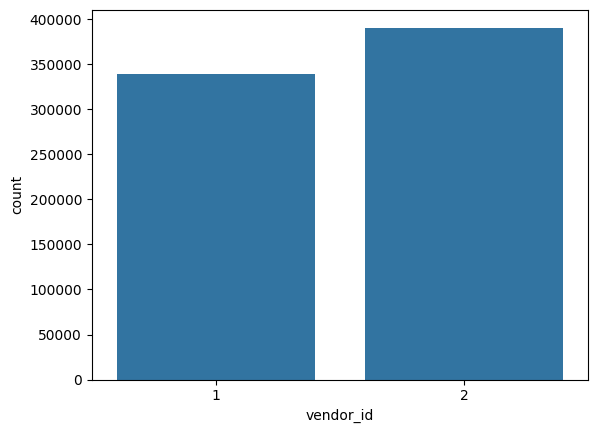

In [ ]:
sns.countplot(x='vendor_id',data=data_d)

In [ ]:
data_d.passenger_count.value_counts()


passenger_count
1    517414
2    105096
5     38926
3     29692
6     24107
4     14049
0        33
7         1
9         1
Name: count, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

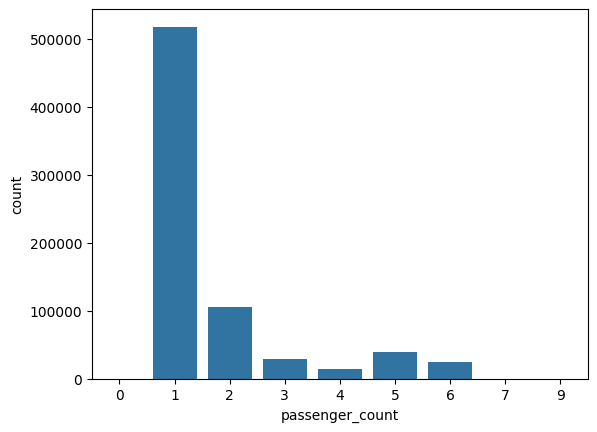

In [ ]:
sns.countplot(x='passenger_count',data=data_d)

In [ ]:
data_d=data_d[data_d['passenger_count']!=0]
data_d=data_d[data_d['passenger_count']<=6]

In [ ]:
data_d['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994463
Y    0.005537
Name: proportion, dtype: float64

In [ ]:
data_d['distance'].value_counts()

distance
0.000000      2893
0.034365        51
0.068730        34
0.034365        32
0.034365        25
              ... 
327.464165       1
86.669016        1
212.893990       1
190.808463       1
458.721384       1
Name: count, Length: 726165, dtype: int64

In [ ]:

# Remove the outliers
data_f= data_d[((data_d['distance'] >=2) & (data_d['distance'] <=50))&\
                 (data_d['trip_duration'] <= 200) & (data_d['trip_duration'] > 1)].copy()

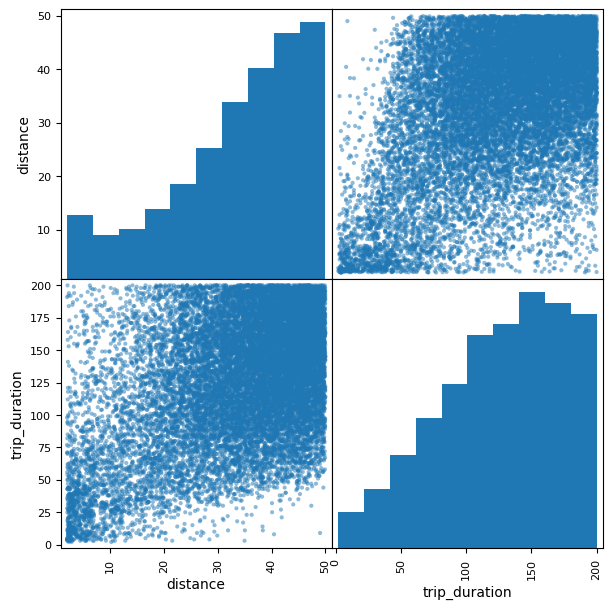

In [ ]:

pd.plotting.scatter_matrix(frame = data_f[[ 'distance', 'trip_duration']], figsize=(7,7));

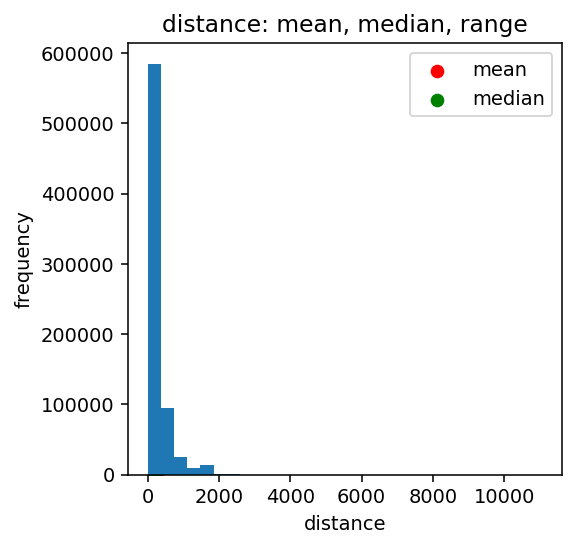

In [ ]:
plt.figure(figsize = (4,4), dpi = 140)

# Plotting histogram and descriptive summary
plt.scatter(data_d['distance'].mean(), 0, label = 'mean', color = 'red')
plt.scatter(data_d['distance'].median(), 0, label = 'median', color = 'green')
plt.hist(data_d['distance'],bins=30)

# axes labels
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title('distance: mean, median, range')
plt.legend()

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

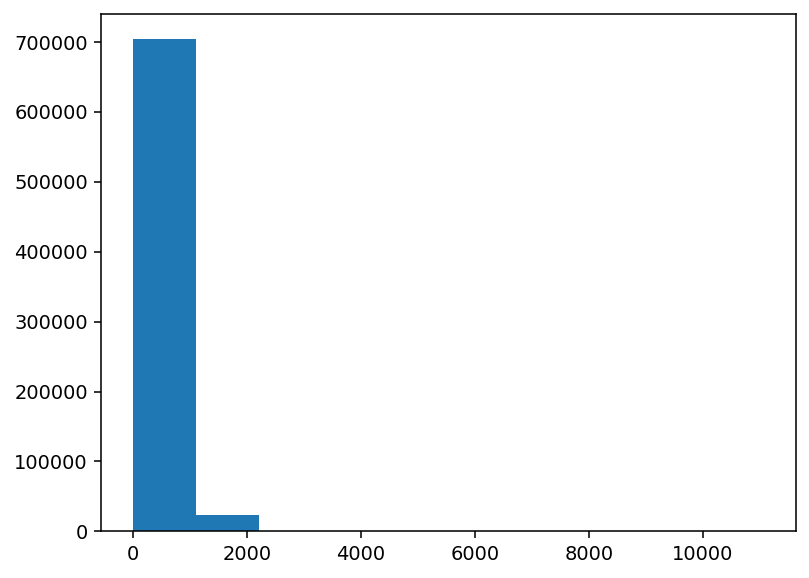

In [ ]:
plt.figure(dpi = 140)
plt.hist(data_d['distance'],bin=100)
plt.xlabel("distance")
plt.ylabel('Frequency')
plt.title("histogram :Trip Distance")
plt.show()

<ipython-input-52-2ddd58d761b6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_d['distance'], shade = True)


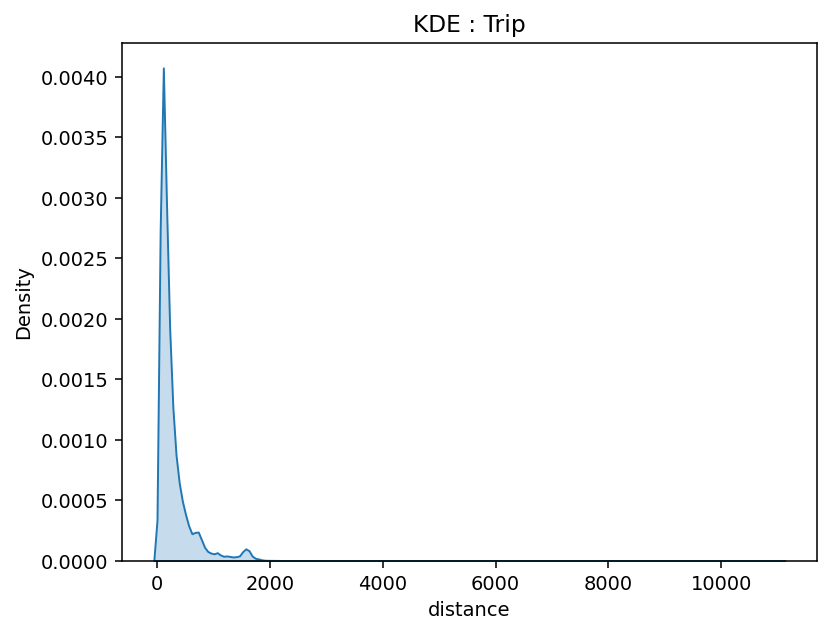

In [ ]:
plt.figure(dpi = 140)
sns.kdeplot(data_d['distance'], shade = True)
plt.xlabel("distance")
plt.ylabel('Density')
plt.title("KDE : Trip")
plt.show()

<ipython-input-53-aad1c4c1879c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_d['passenger_count'], shade = True)


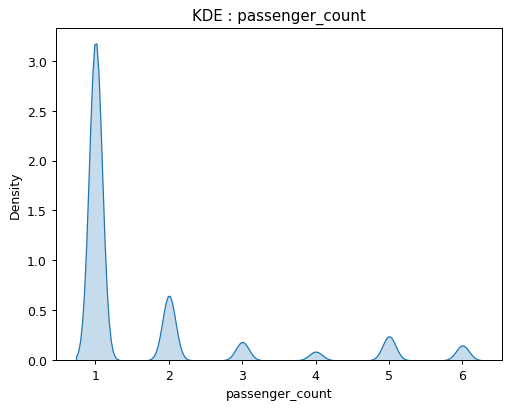

In [ ]:
plt.figure(dpi = 90)
sns.kdeplot(data_d['passenger_count'], shade = True)
plt.xlabel("passenger_count")
plt.ylabel('Density')
plt.title("KDE : passenger_count")
plt.show()

In [ ]:
data_d

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_diff,longitude_diff,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,-0.007710,-0.009956,93.960025
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,-0.036812,-0.006439,334.070398
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.053459,0.049286,574.076699
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.020908,0.004890,190.893232
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.032162,0.028938,342.717811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,-0.000599,0.013283,84.672367
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,-0.005524,-0.004654,57.836770
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,-0.020489,-0.003639,186.005883
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,0.005569,-0.006844,66.226183
